In [12]:
# # Лабораторная работа по линейной регрессии на данных insurance_miptstats.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



In [13]:
# Загрузка данных с проверкой
try:
    data = pd.read_csv('insurance_miptstats.csv')
    print("Данные успешно загружены. Первые 5 строк:")
    print(data.head())
except Exception as e:
    print(f"Ошибка при загрузке файла: {e}")
    # Попробуем альтернативные кодировки
    try:
        data = pd.read_csv('insurance_miptstats.csv', encoding='utf-8')
    except:
        try:
            data = pd.read_csv('insurance_miptstats.csv', encoding='cp1251')
        except Exception as e:
            print(f"Не удалось загрузить файл: {e}")
            raise

# Проверим наличие всех ожидаемых столбцов
expected_columns = ['birthday', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
if not all(col in data.columns for col in expected_columns):
    missing = set(expected_columns) - set(data.columns)
    raise ValueError(f"Отсутствуют столбцы: {missing}")


Данные успешно загружены. Первые 5 строк:
     birthday     sex     bmi  children smoker     region      charges
0  2001-12-20  female  27.900         0    yes  southwest  16884.92400
1  2003-03-18    male  33.770         1     no  southeast   1725.55230
2  1992-11-02    male  33.000         3     no  southeast   4449.46200
3  1987-07-27    male  22.705         0     no  northwest  21984.47061
4  1988-11-04    male  28.880         0     no  northwest   3866.85520


In [14]:
#Предварительный анализ данных

# Основная информация
print("\nИнформация о данных:")
print(data.info())

# Статистика по числовым столбцам
print("\nОписательная статистика:")
print(data.describe())

# Пропущенные значения
print("\nПропущенные значения:")
print(data.isnull().sum())



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birthday  1338 non-null   object 
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB
None

Описательная статистика:
               bmi     children       charges
count  1338.000000  1338.000000   1338.000000
mean     30.663397     1.094918  13270.422265
std       6.098187     1.205493  12110.011237
min      15.960000     0.000000   1121.873900
25%      26.296250     0.000000   4740.287150
50%      30.400000     1.000000   9382.033000
75%      34.693750     2.000000  16639.912515
max      53.130000     5.000000  63770.428010

Пропущенные 

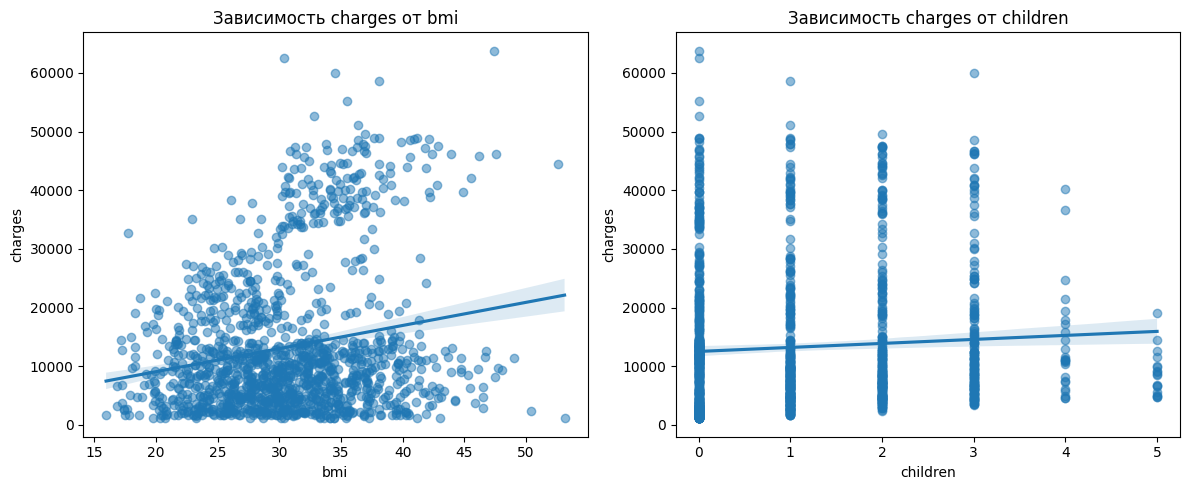

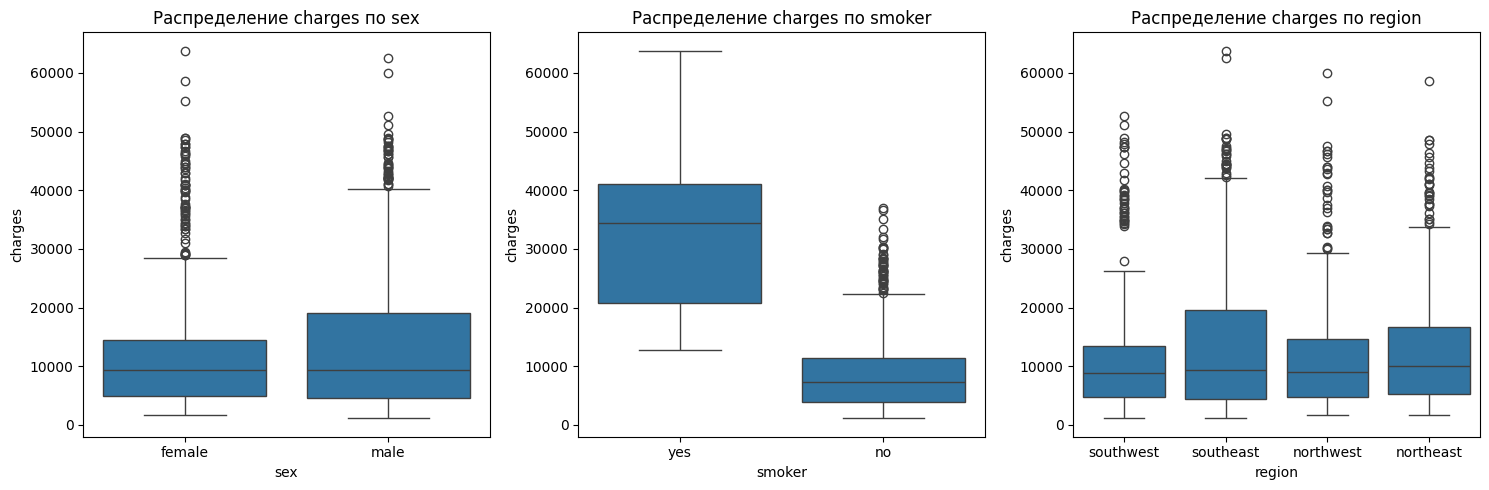

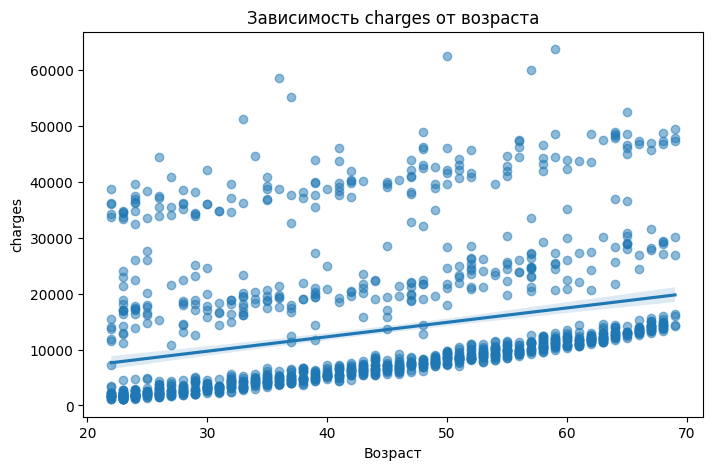

In [15]:
# Визуализация зависимостей charges от других признаков

# Графики для числовых признаков
numeric_features = ['bmi', 'children']
plt.figure(figsize=(12, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.regplot(x=data[feature], y=data['charges'], scatter_kws={'alpha':0.5})
    plt.title(f'Зависимость charges от {feature}')
    plt.xlabel(feature)
    plt.ylabel('charges')
plt.tight_layout()
plt.show()

# Графики для категориальных признаков
categorical_features = ['sex', 'smoker', 'region']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.boxplot(x=data[feature], y=data['charges'])
    plt.title(f'Распределение charges по {feature}')
    plt.xlabel(feature)
    plt.ylabel('charges')
plt.tight_layout()
plt.show()

# Обработка даты рождения (преобразуем в возраст)
data['birthday'] = pd.to_datetime(data['birthday'], errors='coerce')
data['age'] = (pd.to_datetime('today') - data['birthday']).dt.days / 365.25
data['age'] = data['age'].round().astype(int)

# Визуализация зависимости от возраста
plt.figure(figsize=(8, 5))
sns.regplot(x=data['age'], y=data['charges'], scatter_kws={'alpha':0.5})
plt.title('Зависимость charges от возраста')
plt.xlabel('Возраст')
plt.ylabel('charges')
plt.show()

In [16]:
# Подготовка данных для регрессии

# Кодируем категориальные переменные
label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Выбираем признаки для модели
features = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']
X = data[features].values
y = data['charges'].values

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Линейная регрессия

# %%
# Создаем и обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка модели
print("Коэффициенты модели:")
print(f"Свободный член (intercept): {model.intercept_:.2f}")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")

print("\nМетрики качества:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2: {r2_score(y_test, y_pred):.2f}")

Коэффициенты модели:
Свободный член (intercept): -13131.15
age: 257.68
bmi: 335.70
children: 423.86
sex: -33.30
smoker: 23646.57
region: -272.16

Метрики качества:
MSE: 33578903.92
R2: 0.78


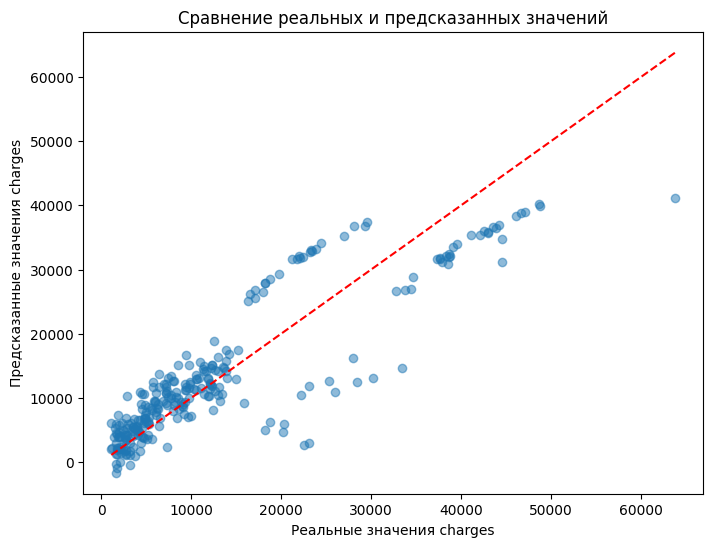

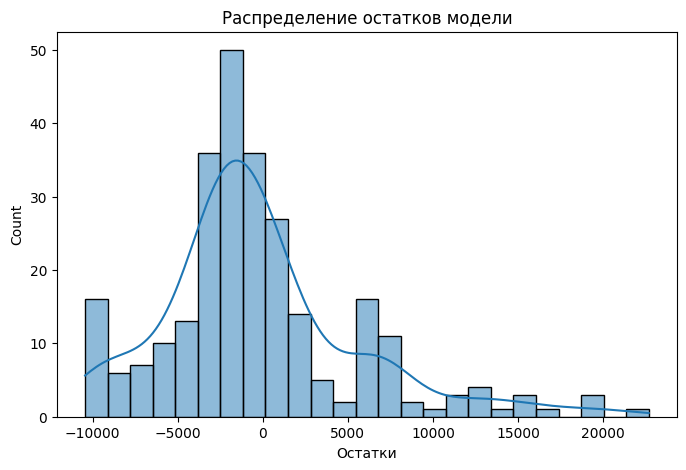

In [18]:
# Визуализация результатов

# Сравнение предсказанных и реальных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения charges')
plt.ylabel('Предсказанные значения charges')
plt.title('Сравнение реальных и предсказанных значений')
plt.show()

# Остатки модели
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков модели')
plt.xlabel('Остатки')
plt.show()


In [19]:
# Таблица с результатами предсказаний

# Создаем DataFrame с результатами
results = pd.DataFrame({
    'Возраст': X_test[:, 0],
    'BMI': X_test[:, 1],
    'Дети': X_test[:, 2],
    'Пол': X_test[:, 3],
    'Курильщик': X_test[:, 4],
    'Регион': X_test[:, 5],
    'Реальные charges': y_test,
    'Предсказанные charges': y_pred,
    'Ошибка': np.abs(y_test - y_pred)
})

# Декодируем категориальные переменные для наглядности
results['Пол'] = results['Пол'].map({0: 'female', 1: 'male'})
results['Курильщик'] = results['Курильщик'].map({0: 'no', 1: 'yes'})
results['Регион'] = label_encoders['region'].inverse_transform(results['Регион'].astype(int))

# Выводим первые 10 строк
print("\nТаблица с результатами предсказаний:")
display(results.head(10))

# Средняя абсолютная ошибка
print(f"\nСредняя абсолютная ошибка: {results['Ошибка'].mean():.2f}")


Таблица с результатами предсказаний:


,Возраст,BMI,Дети,Пол,Курильщик,Регион,Реальные charges,Предсказанные charges,Ошибка
0,50.0,25.175,2.0,female,no,northeast,9095.06825,9051.637694,43.430556
1,40.0,30.020,0.0,female,no,northwest,5272.17580,6981.431072,1709.255272
2,68.0,26.885,0.0,female,yes,northwest,29330.98315,36790.582485,7459.599335
3,50.0,25.745,3.0,male,no,northwest,9301.89355,9361.374266,59.480716
4,23.0,31.920,0.0,male,yes,northwest,33750.29180,26851.999852,6898.291948
5,38.0,42.900,1.0,male,no,southwest,4536.25900,10636.075769,6099.816769
6,23.0,22.515,0.0,female,no,northwest,2117.33885,81.498536,2035.840314
7,68.0,37.905,0.0,male,no,northwest,14210.53595,16810.084632,2599.548682
8,32.0,17.290,0.0,female,no,northeast,3732.62510,918.749423,2813.875677
9,54.0,28.690,3.0,male,no,northwest,10264.44210,11380.713925,1116.271825



Средняя абсолютная ошибка: 4189.81
